# ¿Qué es una red neuronal artificial (ANN)?

Una red neuronal consta de una serie
de algoritmos que se esfuerzan por
reconocer las relaciones subyacentes en
un conjunto de datos a través de un
proceso que imita la forma en que opera
el cerebro humano.

Es un sistema compuesto por una gran cantidad de elementos básicos (Neuronas Artificiales), agrupados en capas (Capas) y altamente interconectados (Sinapsis);
Esta estructura tiene varias entradas y salidas, las cuales serán entrenadas para reaccionar (valores O), de la manera deseada, a los estímulos de entrada (valores I).
Estos sistemas, de cierta manera, formulan el cerebro humano. Requiere que aprendan a comportarse (Aprendizaje) y alguien debe encargarse de enseñarles o capacitarlos (Entrenamiento), en base a un conocimiento previo del entorno problemático.

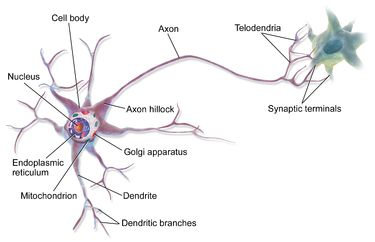
**Neuronas:** componentes elementales conformados
por el cuerpo celular, las dendritas y los axones.

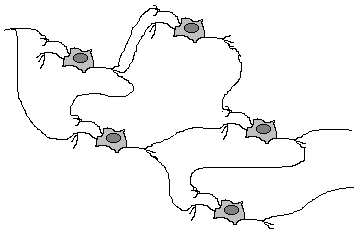

La mayoría de las neuronas tienen una estructura similar a la de un árbol llamado anndrita que recibe señales de entrada que provienen de otras neuronas a través de la sinapsis.


Se espera que estas RNA tengan características similares a las del cerebro:
- Sea robusto y tolerante a fallos.
- Se Flexible.
- Puede trabajar con información borrosa, incompleta, probabilística, ruidosa o
inconsistente.
- Son muy paralelos.


 >"Una sola neurona en el cerebro es una
  máquina increíblemente compleja que incluso
  hoy no entendemos. Una sola
  "Neurona" en una red neuronal es una
  función matemática increíblemente simple
  que captura una fracción minúscula de la
  complejidad de una neurona biológica. "
>[Andrew NG](https://es.wikipedia.org/wiki/Andrew_Ng)


### Los componentes básicos de una neurona artificial

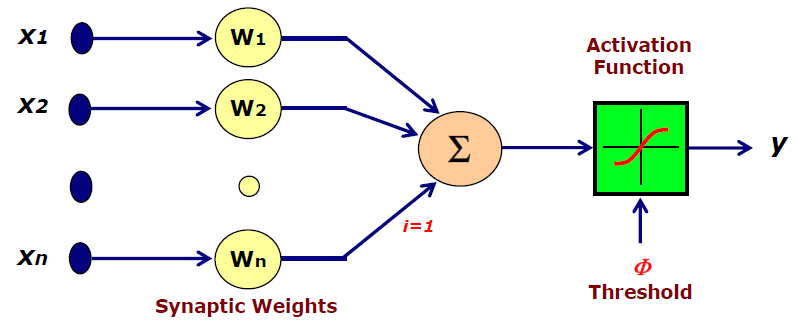

Los elementos básicos de una neurona artificial son un conjunto de nodos de entrada, indexados por, digamos, 1, 2, ... n, que recibe la señal de entrada o vector patrón correspondiente. Un conjunto de conexiones sinápticas cuyas fortalezas están representadas por un conjunto de pesos, aquí denotado por w = (w1, w2, ... wn); una función de suma Σ que concentra las entradas; y una función de activación Φ que relaciona la entrada sináptica total con la salida (activación) de la neurona.

### Estructura de una red neuronal artificial

Si tenemos N neuronas, podemos ordenarlas arbitrariamente y designarlas como
unidades. Tu trabajo es sencillo y único, y consiste en recibir tickets del
celdas vecinas y calcular un valor de salida, que se envía a todas las celdas
restante.

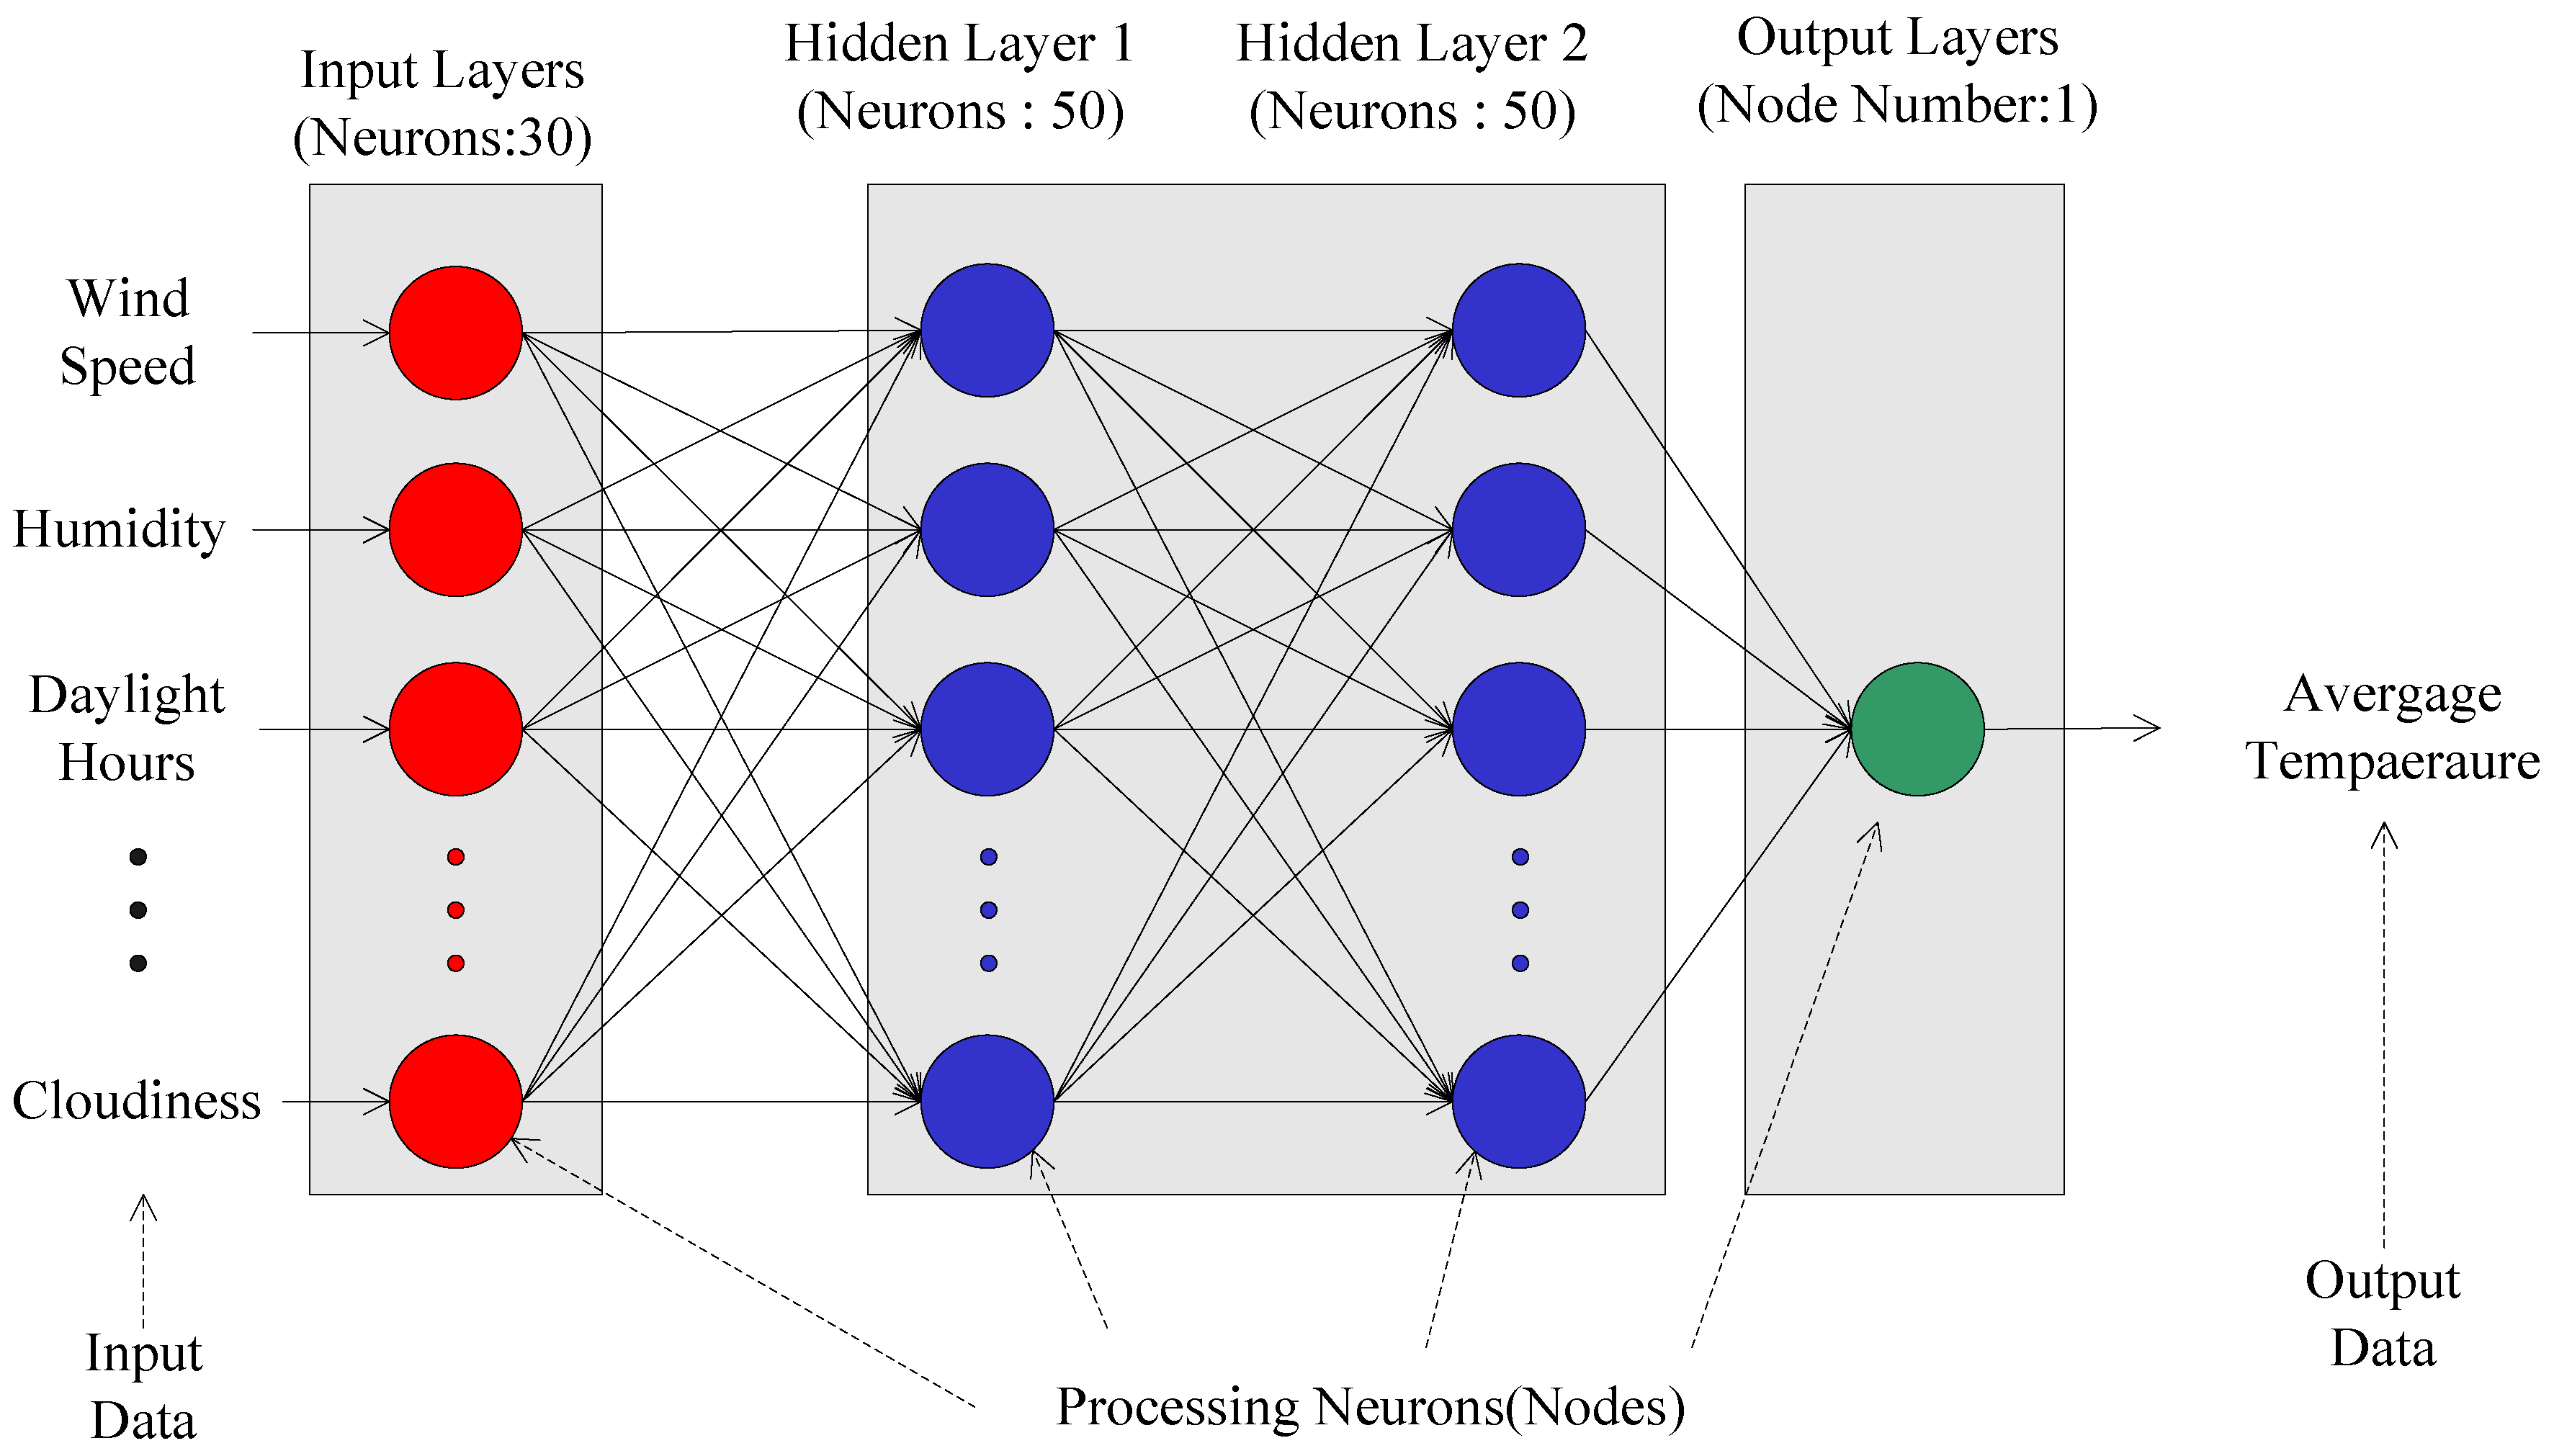

En la figura anterior podemos ver una capa de entrada (en color rojo), donde cada neurona recibe el valor que representa una característica climática. También observamos dos capas ocultas (en azul), se llaman así ya que son las que realizan los cálculos y predicciones internamente en la red. Y finalmente una capa de salida (en color verde) que da como resultado la predicción de la temperatura media según las condiciones climáticas introducidas.

En este caso solo tenemos un valor de salida, pero podríamos tener más de uno dependiendo del caso a procesar.

### Entrenamiento, propagación hacia adelante y hacia atrás

Para entrenar una red y construir un modelo exitoso, se le proporciona un flujo de datos de entrada y el valor de salida esperado.

- Propagación hacia adelante
1. Un minibatch a la vez.
1. Cada paso de la información es una época.
1. Cada capa procesa los estímulos y su
la salida pasa a la siguiente capa hasta
la capa de salida.
1. El error en la salida se mide con
funciones de pérdida.
- Propagación hacia atrás
1. Se calcula la contribución en el error
de cada conexión de la capa anterior
usando la regla de la cadena (derivada).
1. El gradiente de error se propaga a
todos los pesos en las conexiones.
1. Un gradiente descendente corre
para ajustar los pesos sinápticos de
toda la red.


Este proceso se repite n veces hasta obtener la precisión deseada en la predicción.
Los pesos obtenidos en la red que logran predecir correctamente la salida conforman nuestro modelo neuronal, que luego podemos utilizar en nuestras aplicaciones.



# ¿Cómo programar una red neuronal?

Por ejemplo, usaremos las puertas XOR. Si no los conoce o no la recuerda, funcionan de la siguiente manera.

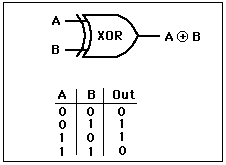

Tenemos dos entradas binarias (1 o 0) y la salida será 1 solo si una de las entradas es verdadera (1) y la otra falsa (0).

Es decir que de cuatro posibles combinaciones, solo dos tienen salida 1 y las otras dos serán 0, como vemos aquí:

- XOR (0,0) = 0
- XOR (0,1) = 1
- XOR (1,0) = 1
- XOR (1,1) = 0

Usaremos [Keras](https://keras.io/), que es una librería de alto nivel, para que nos sea más fácil describir las capas de la red que creamos y en segundo plano, es decir, el motor que ejecutará la red neuronal y la entrenará será la implementación de Google llamada [Tensorflow](https://www.tensorflow.org/), que es la mejor que existe en la actualidad.

In [ ]:
!pip install keras

### Creamos la red neuronal

Primero importamos las clases que usaremos:

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Usaremos numpy para manejar matrices. Desde Keras importamos el tipo de modelo Sequential y el tipo de capa Densa que es el "normal".

Creamos las matrices de entrada y salida.

In [ ]:
# cargamos las 4 combinaciones de las puertas XOR
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array([[0],[1],[1],[0]], "float32")

Como puede ver, las cuatro posibles entradas de la función XOR son [0,0], [0,1], [1,0], [1,1] y sus cuatro salidas: 0,1,1,0.

Ahora crearemos la arquitectura de nuestra red neuronal:

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Primero creamos un modelo vacío de tipo Sequential. Este modelo se refiere al hecho de que crearemos una serie de capas de neuronas secuenciales, "una frente a la otra".

Agregamos dos capas densas con "model.add ()". En realidad, serán 3 capas, porque al establecer input_dim = 2 estamos definiendo la capa de entrada con 2 neuronas (para nuestras entradas de la función XOR) y la primera capa oculta (oculta) de 16 neuronas. Como función de activación usaremos "relu" que sabemos da buenos resultados. Podría ser otra función, esto es un mero ejemplo, y dependiendo de la implementación de la red que hagamos tendremos que variar el número de neuronas, capas y sus funciones de activación.

Y agregamos una capa con 1 neurona de salida y función de activacion sigmoide.

Veamos lo que hemos hecho hasta ahora:

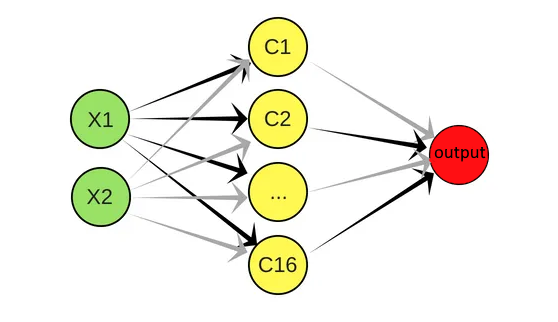

La arquitectura de 3 capas que creamos para esta red neuronal artificial

### ¡Entrena a la red!

Antes de entrenar la red haremos algunos ajustes a nuestro modelo:

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
# para ver el resumen de la estructura de nuestra red
model.summary()

Con esto indicamos el tipo de pérdida (parámetro loss) que utilizaremos, el "optimizador" de los pesos de las conexiones neuronales y las métricas que queremos obtener.

Ahora entrenaremos la red:

In [ ]:
model.fit(training_data, target_data, epochs=1000)

Indicamos con model.fit () las entradas y sus salidas y el número de iteraciones de aprendizaje ((epochs)) de entrenamiento. Este es un ejemplo simple, pero recuerde que los modelos más grandes y complejos requerirán más iteraciones y el entrenamiento será más lento al mismo tiempo.

#### Resultados de entrenamiento

Si vemos los resultados del entrenamiento, vemos que la primera línea dice:

```Epoch 1/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.2634 - binary_accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 457us/step - loss: 0.2630 - binary_accuracy: 0.2500
```
Con esto vemos que la primera iteración "tuvo algo de suerte" y alcanzó la mitad de las salidas (0.5) pero a partir de la segunda, solo alcanzó 1 de 4 (0.25).

Luego en la "Epoch" 24 recupera el 0.5 de aciertos, ya no es "por suerte", sino por haber ajustado correctamente los pesos de la red.

```Epoch 24/1000
4/4 [==============================] - 0s 482us/step - loss: 0.2549 - binary_accuracy: 0.5000

Epoch 107/1000
4/4 [==============================] - 0s 621us/step - loss: 0.2319 - binary_accuracy: 0.7500

Epoch 169/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2142 - binary_accuracy: 1.0000
```
Y -en mi caso- en la iteración 107 aumenta los aciertos a 0,75 (son 3 de 4) y en la iteración 169 alcanza el 100% de aciertos y permanece así hasta el final. Dado que los pesos iniciales de la red son aleatorios, las salidas que tiene en su computadora pueden ser ligeramente diferentes en términos de iteraciones, pero llegará a una “precisión binaria” (binara_accuracy) de 1.0.

### Evaluar y predecir

Primero evaluamos el modelo

In [ ]:
scores = model.evaluate(training_data, target_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Y vemos que teníamos un 100% de precisión (recordemos la trivialidad de este ejemplo).

Y hacemos las 4 posibles predicciones XOR, pasando nuestras entradas:

In [ ]:
print (model.predict(training_data).round())

y vemos las salidas 0,1,1,0 que son correctas.

### Parámetros de ajuste de la red neuronal
Recuerde que este es un ejemplo muy simple con solo 4 entradas posibles. Pero si en realidad tuviéramos una red compleja, deberíamos poder ajustar muchos parámetros, repasemos:

- Número de capas de la red (en nuestro caso son 3)
- Número de neuronas en cada red (tenemos 2 entradas, 16 en la capa oculta y 1 salida)
- Funciones de activación de cada capa. Usamos relu y sigmoid
- Al compilar el modelo, defina las funciones de pérdida, optimizador y métrica.
- Número de iteraciones de entrenamiento.

En este ejemplo, que es muy simple, puede intentar variar, por ejemplo, el número de neuronas de entrada, pruebe con 8 o 32 y vea qué resultados obtiene. Por ejemplo, si necesita más o menos iteraciones para alcanzar el 100% de éxito. Realmente podemos apreciar que hay muchos metaparámetros que ajustar. Si hiciéramos la combinatoria de todos ellos, tendríamos una cantidad terrible de posibles ajustes. Y, sobre todo, depende de usted decidir esos parámetros y ajustarlos.

### Guarda la red y úsala -de verdad-
Si este fuera un caso real, en el que entrenamos una red, la ajustamos y obtenemos buenos resultados, ahora deberíamos Guardar esa red ya que esa red óptima tiene los pesos que estábamos buscando. Sería tonto y llevaría mucho tiempo entrenar a la red cada vez antes de "publicar para producción".

Lo que hacemos es guardar esa red y en OTRO código cargaríamos la red y la usaríamos como si fuera una biblioteca o una función que creamos. Pasando tickets y obteniendo las predicciones.

Para guardar y cargar nuestra red, usaremos el siguiente código de ejemplo:

In [ ]:
# serializar el modelo a JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serializar los pesos a HDF5
model.save_weights("model.h5")
print("Modelo Salvado!")

# despues...

# cargar json y crear el modelo
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# cargar los pesos al nuevo modelo
loaded_model.load_weights("model.h5")
print("Cargando modelo desde el disco.")

# Compilamos el modelo y ya esta listo para su uso
loaded_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])

Después de esto, normalmente usaríamos loaded_model.predict () y ¡listo!

In [ ]:
print (model.predict(training_data).round())

**NOTA:** En verdad, podríamos haber resuelto esto con la programación tradicional, pero solo usamos este ejemplo académicamente

### Ejercicio 1

Tomando como ejemplo el ejercicio anterior de la puerta XOR. cree el modelo de nuevo, pero agregue una segunda capa oculta de 8 neuronas. Y obtenga el resumen del modelo para ver la estructura.

In [ ]:
## Code Here


#### Solución


In [2]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(8, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
# para ver el resumen de la estructura de nuestra red
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Ejercicio 2
Sobre la base de lo que aprendió anteriormente, cree una red neuronal que resuelva la puerta XNOR.

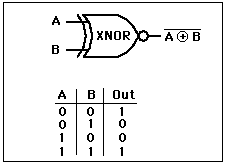

- Debe tener una capa oculta de 6 neuronas y una segunda capa de 4 neuronas.
- Mostrar el resumen de la red
- Necesita crear los datos de entrenamiento y salida y luego entrenar la red con una epochs = 1000.
- Finalmente, muestra en pantalla la puntuación de la red obtenida de tu evaluación.

In [ ]:
# code here

#### Solución

In [ ]:

# cargamos las 4 combinaciones de las puertas XOR
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array([[1],[0],[0],[1]], "float32")

model = Sequential()
model.add(Dense(6, input_dim=2, activation='relu'))
model.add(Dense(4, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
# para ver el resumen de la estructura de nuestra red
model.summary()

model.fit(training_data, target_data, epochs=1000)

scores = model.evaluate(training_data, target_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

print (model.predict(training_data).round())


# **Ejemplo: predicción del cáncer de mama (regresión lineal)**
**Conjunto de datos de Wisconsin (diagnóstico) sobre el cáncer de mama.**
[Dataset link in Kaggle](
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

Bajamos el Dataset

In [3]:
import gdown
url = 'https://drive.google.com/uc?id=12fb5fJg3f2S6roJ1_sFOSvw7c_oUzbOw'
output = 'data.csv'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=12fb5fJg3f2S6roJ1_sFOSvw7c_oUzbOw
To: /content/data.csv
100%|██████████| 125k/125k [00:00<00:00, 2.71MB/s]


'data.csv'


#### **Importante: recuerda descargar el archivo de datos del enlace indicado y subirlo a la collab con el nombre "data.csv" para que el resto del código funcione correctamente** ####

Como veremos, se trata de un archivo CSV con 32 columnas que contienen las características y diagnóstico de los núcleos celulares de 569 estudios realizados.

Las columnas del archivo CSV del conjunto de datos son:
1. ID
2. Diagnóstico (B = benigno, M = maligno)
3. Radio medio.
4. Textura.
5. Perímetro.
6. Área.
7. Suavidad.
8. Compacidad.
9. Concavidad.
10. Puntos cóncavos.
11. Simetría.
12. Dimensión fractal.

La primera columna es un número de identificación, la segunda el diagnóstico (que usaremos como "resultado esperado" para el entrenamiento supervisado) y luego, de la columna 3 a la 12 tenemos 10 características (media). Finalmente, de las columnas 13 a 32, el error estándar y la media de los tres valores más altos se repiten para estas diez características.





## **Preparando el entorno**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# seleccionamos Tensorflow 2.0
try:
  # El comando %tensorflow_version solo existe en Colaboratory. Es un COMANDO MÁGICO.
  %tensorflow_version 2.x
except Exception:
  pass
from tensorflow import keras
from tensorflow.keras import layers


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## **Leyendo y preparando los datos**

*Referencia de Pandas*
* .read_csv () (Leer un archivo csv y cargar los datos en un marco de datos)
* .head () (Muestra las primeras 5 filas de un marco de datos)
* .tail () (Muestra las últimas 5 filas de un marco de datos)
* .drop () (Soltar filas o columnas del marco de datos)
* .describe () (Devuelve estadísticas del marco de datos)





In [5]:
data_frame = pd.read_csv("data.csv", header = 0)

In [9]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
data_frame.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


Comenzamos a preparar el conjunto de datos eliminando la primera y la última columna que son innecesarias y cambiando el tipo de datos de la columna de "Diagnóstico", 0 = B (benigno), 1 = M (maligno)

### **Elimina la primera y la última columna**

In [10]:
data_frame.drop('id', axis=1, inplace=True)
data_frame.drop('Unnamed: 32', axis=1, inplace=True)

### **Cambiar la columna de diagnóstico, 0 = B (benigno), 1 = M (maligno)**

In [12]:
data_frame['diagnosis'] = data_frame['diagnosis'].map({'M':1,'B':0})

### **Visualización de conjuntos de datos y estadísticas**

Ahora podemos ver los resultados de los primeros cambios en el conjunto de datos y algunas estadísticas con los siguientes comandos.

In [13]:
print(data_frame)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [15]:
data_frame.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## **Analisis Dataset**

### **Seleccionamos las 10 características que corresponden a la media para realizar una exploración de los datos**

In [16]:
features=list(data_frame.columns[1:11])

In [17]:
print(features)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


### **Divida el marco de datos de acuerdo con el diagnóstico**

Dividimos el conjunto de datos en dos según el valor de la columna "diagnóstico" para obtener gráficos que permitan visualizar cuánto influyen las características en la variable Diagnóstico.

In [18]:
mask = data_frame['diagnosis'] == 1
data_frame_M = data_frame[mask]
data_frame_B = data_frame[~mask]

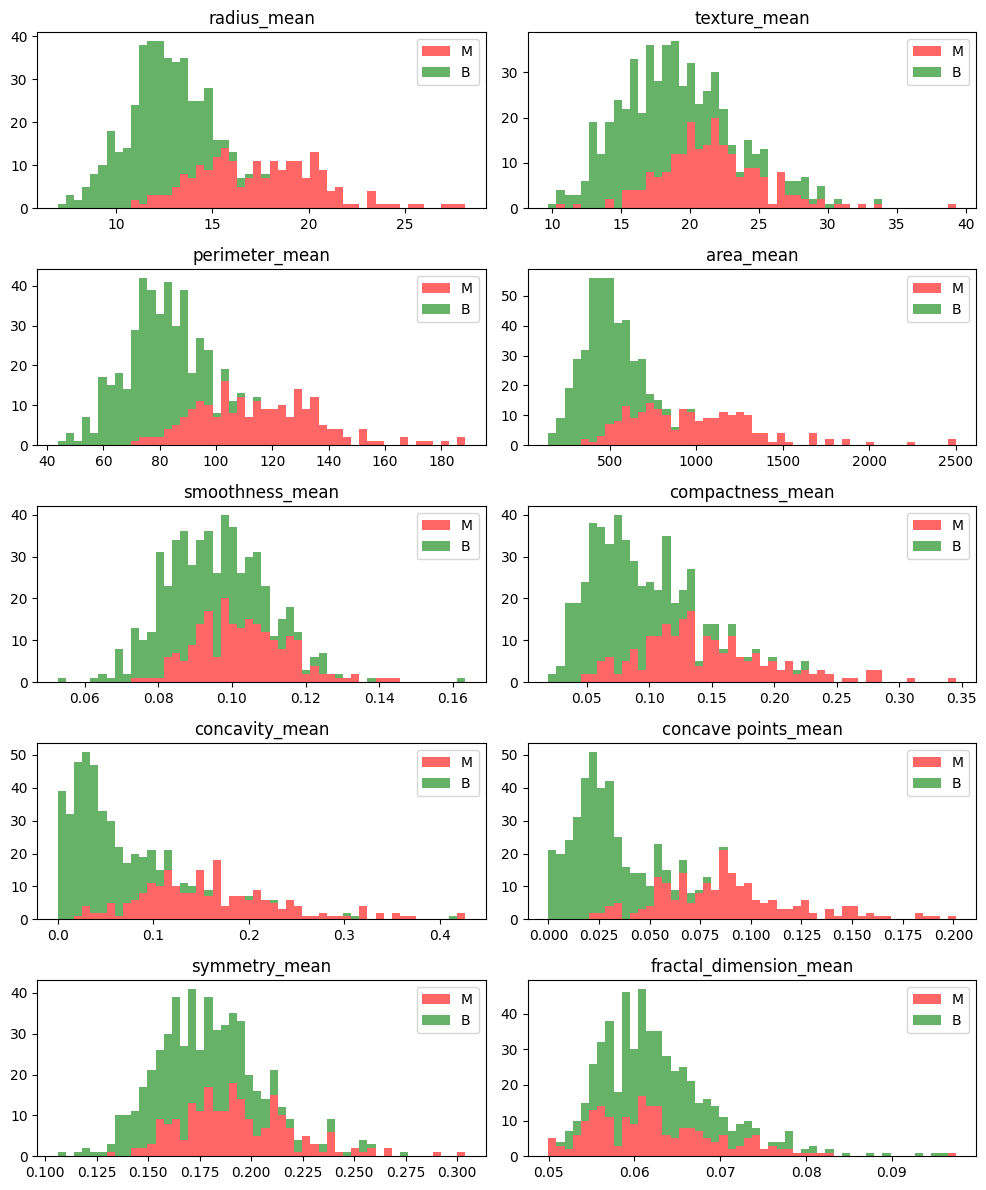

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
axes = axes.ravel()
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  ax.hist([data_frame_M[features[idx]],data_frame_B[features[idx]]], bins=50, alpha=0.6, stacked=True, label=['M','B'],color=['r','g'])
  ax.legend(loc='upper right')
  ax.set_title(features[idx])
plt.tight_layout()
plt.show()

En algunos casos, es útil observar los diagramas de dispersión tomando dos características para ver cómo influyen en el resultado esperado.

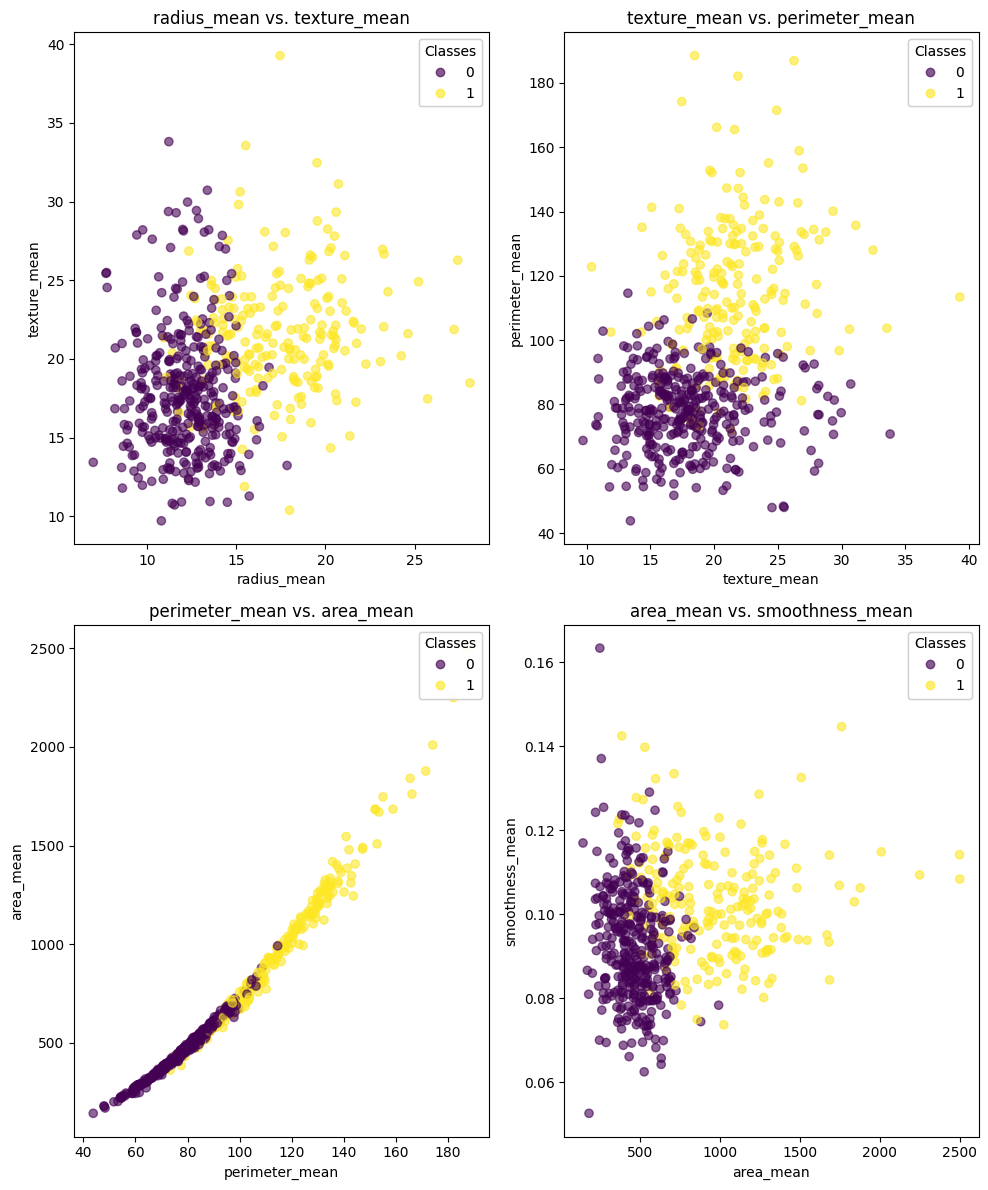

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,12))
axes = axes.ravel()
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  scatter = ax.scatter(data_frame[features[idx]], data_frame[features[idx+1]], c=data_frame['diagnosis'], alpha=0.6, label=['Color 1', 'Color 2'])
  ax.set_xlabel(features[idx])
  ax.set_ylabel(features[idx+1])
  legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
  ax.add_artist(legend1)
  ax.set_title(features[idx]+' vs. '+features[idx+1])
plt.tight_layout()
plt.show()

En estas gráficas podemos ver que las características: radio_mean, area_mean, perimeter_mean, concavity_mean, concave points_mean son las que más influyen en el valor de Diagnóstico, por esta razón se utilizan para alimentar el modelo de Regresión Logística.

### **Balance del conjunto de datos**

Como se trata de un ejercicio básico, se implementó la Precisión ("Accuracy") como métrica, que suele ser la métrica más común, pero si miramos el conjunto de datos podemos ver que no está equilibrado, hay 212 casos con un Diagnóstico maligno y 357 casos con diagnóstico benigno. por lo que sería conveniente aplicar otras métricas para evaluar el modelo aunque esto va más allá del propósito de este post.

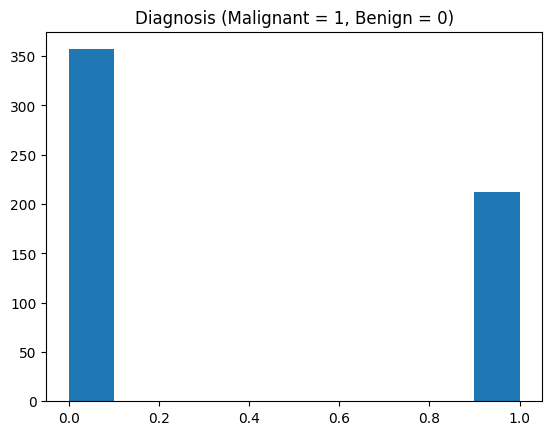

In [21]:
plt.figure().set_facecolor('w')
plt.hist(data_frame['diagnosis'])
plt.title('Diagnosis (Malignant = 1, Benign = 0)')
plt.show()

## **Preparación de datos de prueba y entrenamiento**

Seleccione las características que usaremos como entradas (X) y la salida esperada (y).

Preparamos el conjunto de datos de entrenamiento y prueba con las 5 características que seleccionamos al analizar el conjunto de datos y la columna de "diagnóstico" como resultado esperado.

In [22]:
X = data_frame[['radius_mean', 'area_mean', 'perimeter_mean', 'concavity_mean', 'concave points_mean']]
y = data_frame['diagnosis']

### **Dividir el conjunto de datos - 70% Entrenamiento 30% Prueba**

Para dividir el conjunto de datos y obtener los conjuntos de entrenamiento y prueba, usamos la biblioteca SKlearn, tomando el 30% del conjunto de datos para la prueba, dejando así el 70% para el entrenamiento.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### **Visualizamos cómo eran los conjuntos de datos para entrenamiento y prueba.**

In [24]:
print(X_train, y_train)
print(X_test, y_test)

     radius_mean  area_mean  perimeter_mean  concavity_mean  \
557        9.423      271.3           59.26        0.000000   
224       13.270      546.4           84.55        0.035540   
509       15.460      731.3          103.80        0.203000   
413       14.990      693.7           97.53        0.068590   
134       18.450     1075.0          120.20        0.115300   
..           ...        ...             ...             ...   
101        6.981      143.5           43.79        0.000000   
98        11.600      412.6           74.34        0.041960   
566       16.600      858.1          108.30        0.092510   
327       12.030      446.0           76.09        0.001546   
484       15.730      747.2          102.80        0.119100   

     concave points_mean  
557             0.000000  
224             0.024560  
509             0.085200  
413             0.038760  
134             0.068470  
..                   ...  
101             0.000000  
98              0.033500  


## **Implementación del modelo**

Implementamos el modelo usando Keras. El modelo tiene una sola neurona más una capa de activación sigmoidea, Adam como optimizador, Cross Entropy para la función de error y Accuracy como métrica.

In [25]:
model = keras.Sequential()
model.add(layers.Dense(1, input_dim = 5, kernel_initializer='zeros'))
model.add(layers.Activation('sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(0.00005), loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Lo entrenamos con 150 épocas y un tamaño de lote de 199, que es la mitad del conjunto de datos de entrenamiento, por lo que se forman dos lotes por época.

In [26]:
fit_history = model.fit(X_train.values, y_train.values, validation_data=(X_test, y_test), epochs = 150, batch_size=199)

Epoch 1/150
2/2 [==============================] - 5s 199ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6899 - val_accuracy: 0.3509
Epoch 2/150
2/2 [==============================] - 0s 30ms/step - loss: 0.6892 - accuracy: 0.3819 - val_loss: 0.6877 - val_accuracy: 0.3509
Epoch 3/150
2/2 [==============================] - 0s 32ms/step - loss: 0.6868 - accuracy: 0.3819 - val_loss: 0.6863 - val_accuracy: 0.3509
Epoch 4/150
2/2 [==============================] - 0s 28ms/step - loss: 0.6852 - accuracy: 0.3819 - val_loss: 0.6855 - val_accuracy: 0.3509
Epoch 5/150
2/2 [==============================] - 0s 28ms/step - loss: 0.6843 - accuracy: 0.3819 - val_loss: 0.6849 - val_accuracy: 0.3509
Epoch 6/150
2/2 [==============================] - 0s 36ms/step - loss: 0.6836 - accuracy: 0.3819 - val_loss: 0.6843 - val_accuracy: 0.3509
Epoch 7/150
2/2 [==============================] - 0s 28ms/step - loss: 0.6827 - accuracy: 0.3819 - val_loss: 0.6832 - val_accuracy: 0.3509
Epoch 8/150
2/2 [==

## **Gráficos de precisión y pérdida**

Obtenemos las gráficas de precisión y error para medir el desempeño del modelo.

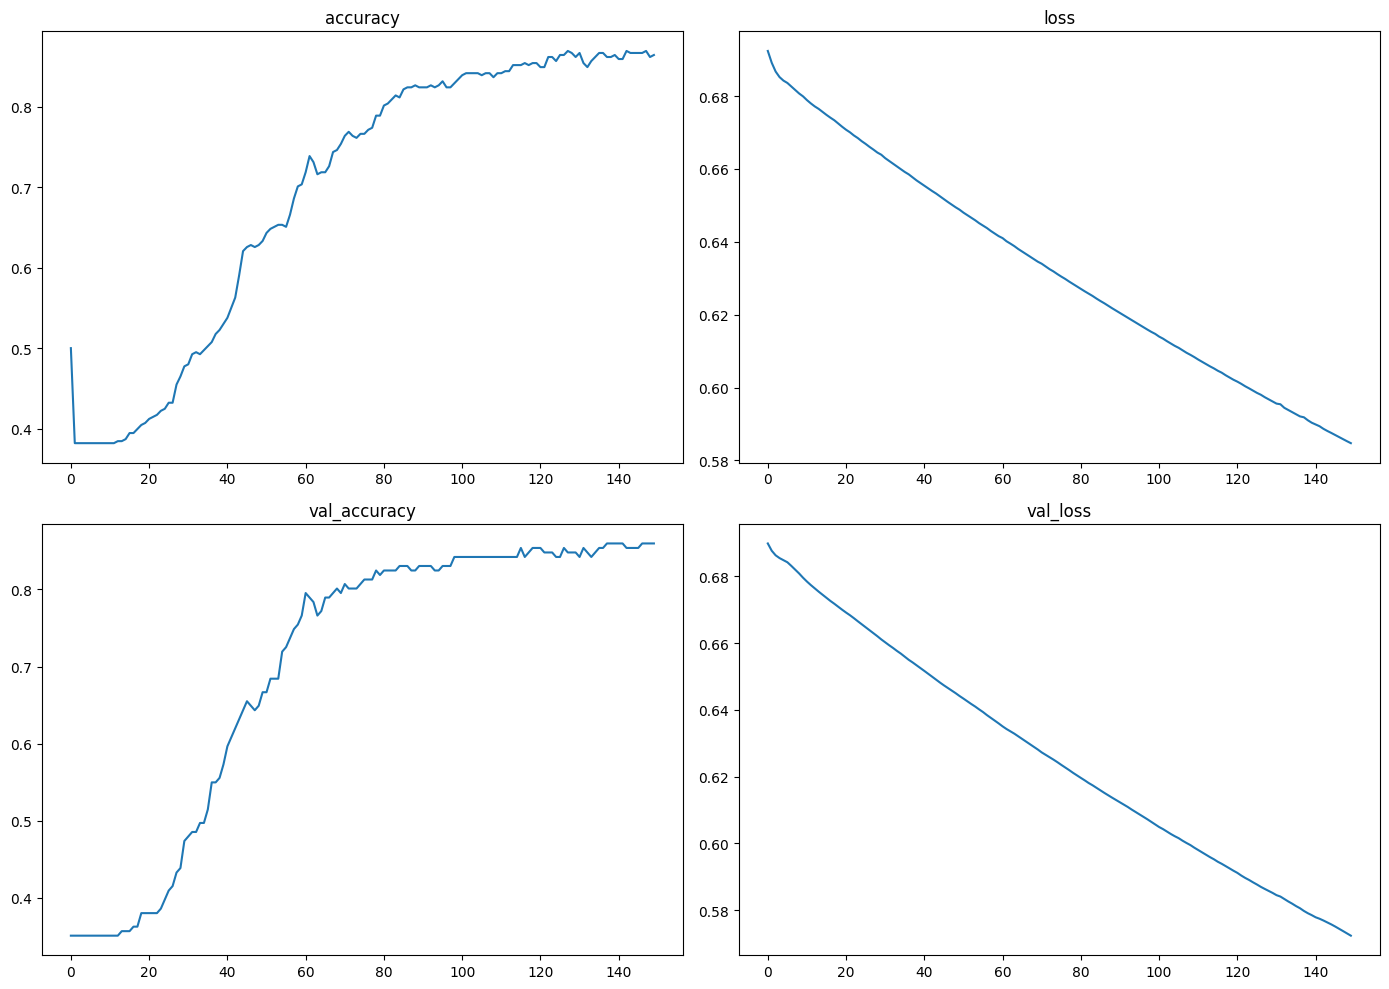

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
axes = axes.ravel()
outputs = ['accuracy', 'loss', 'val_accuracy', 'val_loss']
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  ax.plot(fit_history.history[outputs[idx]])
  ax.set_title(outputs[idx])
plt.tight_layout()
plt.show()

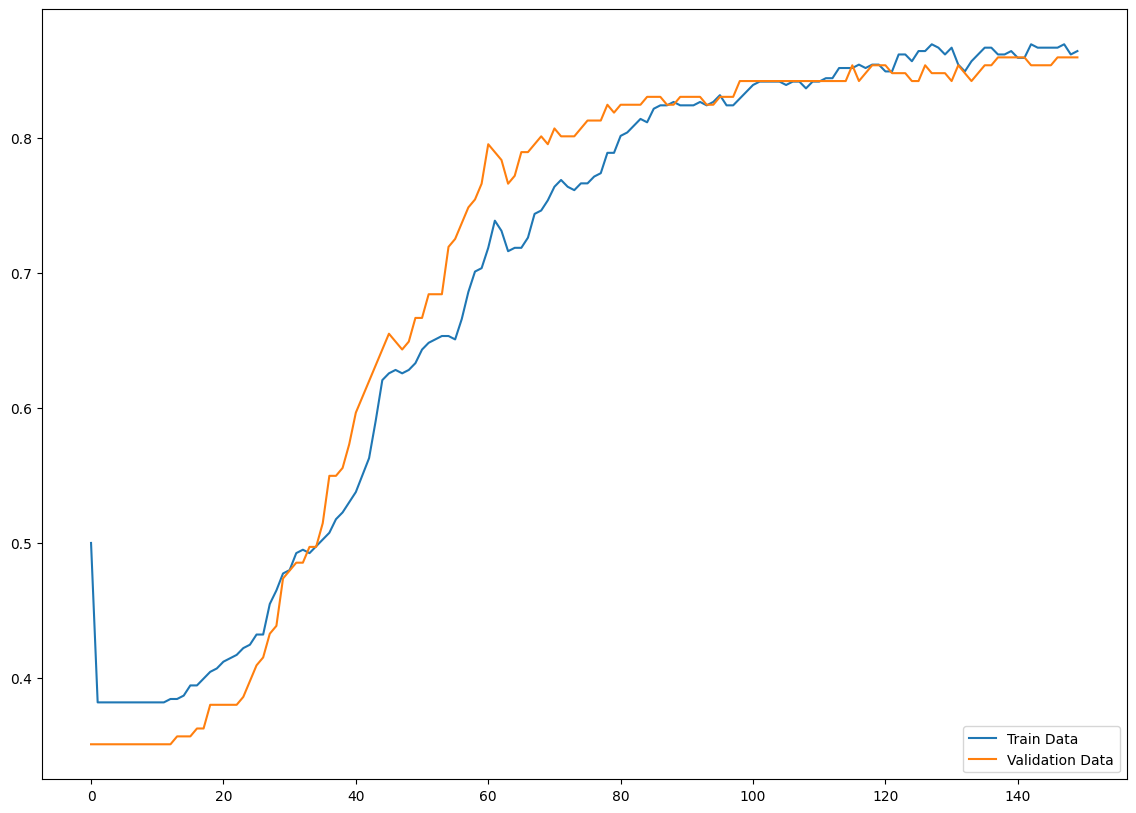

In [28]:
plt.figure(figsize=(14,10), facecolor='w')
plt.plot(fit_history.history['accuracy'], label='Train Data')
plt.plot(fit_history.history['val_accuracy'], label='Validation Data')
plt.legend()
plt.legend(loc='lower right')

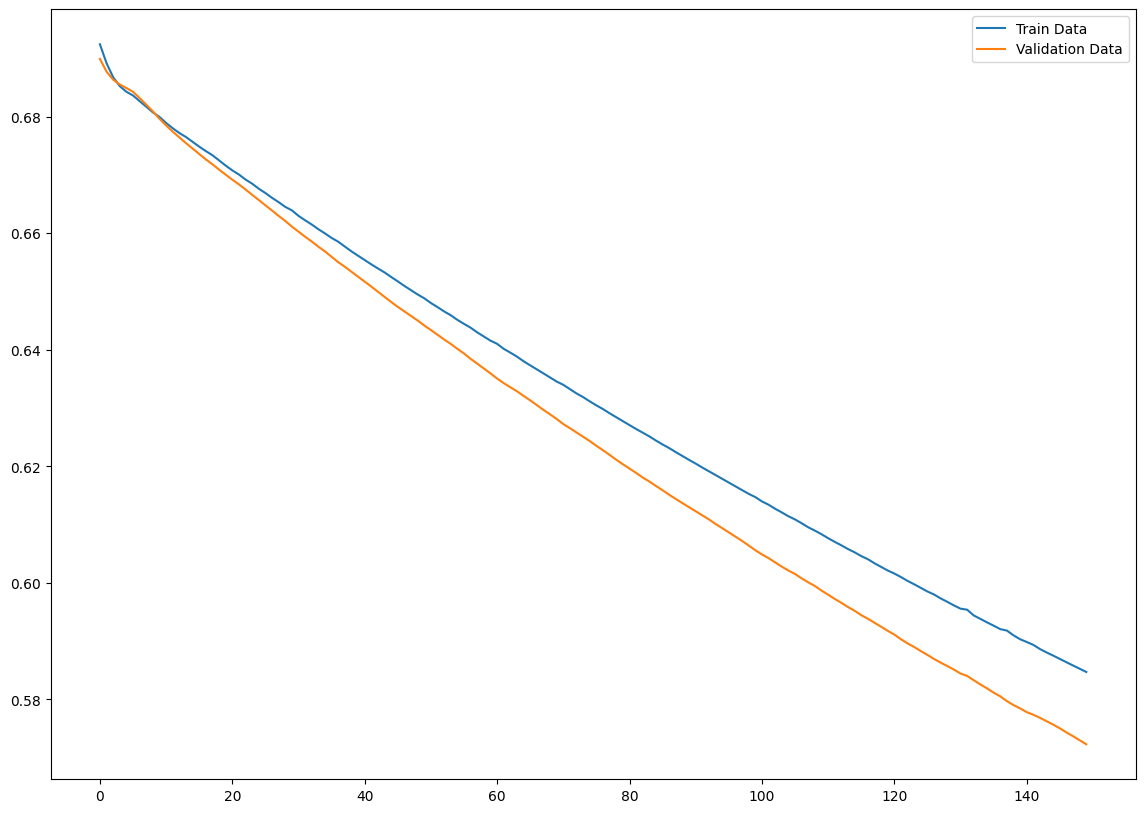

In [29]:
plt.figure(figsize=(14,10))
plt.plot(fit_history.history['loss'], label='Train Data')
plt.plot(fit_history.history['val_loss'], label='Validation Data')
plt.legend()
plt.legend(loc='upper right')

Se puede observar en los gráficos que a partir de la época 100 el rendimiento de la validación comienza a disminuir, mientras que el rendimiento del entrenamiento sigue aumentando. Con más pruebas podríamos determinar si en ese momento conviene dejar de entrenar el modelo para no perder la generalización y evitar el sobreajuste.

## **Evaluar el modelo con los conjuntos de datos Training y Test**

La evaluación final de esta ejecución arrojó un rendimiento de .8772 para el conjunto de prueba.

In [30]:
model.evaluate(X_train, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.8643


[0.5842794179916382, 0.8643215894699097]

In [31]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5723 - accuracy: 0.8596


[0.5723077654838562, 0.859649121761322]



# Ejercicio - Contexto analítico

Necesitamos diseñar un modelo que nos permita determinar el precio medio de las viviendas en Boston, para ello contamos con un conjunto de información disponible en Keras con características y precios de viviendas en distintas localidades de Boston desde finales de la década de 1970. (Más detalles disponibles en [http: //lib.stat.cmu.edu/datasets/boston](http://lib.stat.cmu.edu/datasets/boston)

En total tenemos 506 muestras caracterizadas por 13 variables.

Variables | Descripción
  --- | ---
  CRIM | tasa de criminalidad per cápita por ciudad
  ZN | proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
  INDUS | proporción de acres comerciales no minoristas por ciudad
  CHAS | Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
  NOX | concentración de óxidos nítricos (partes por 10 millones)
  RM | número medio de habitaciones por vivienda
  AGE | proporción de unidades ocupadas por sus propietarios construidas antes de 1940
  DIS | distancias ponderadas a cinco centros de empleo de Boston
  RAD | índice de accesibilidad a carreteras radiales
  TAX | tasa de impuesto a la propiedad de valor total por \$ 10,000
  PTRATIO | Proporción alumno-maestro por ciudad
  B | 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
  LSTAT | % menor estado de la población
  MEDV | Valor medio de las viviendas ocupadas por sus propietarios en $ 1000s




Keras tiene muchos conjuntos de datos integrados para uso académico. Importamos el conjunto de datos de Boston para nuestro ejercicio.

```
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2,seed=10)
```

In [ ]:
# Copy and paste the code here to import the dataset


salida esperada:
```
Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/boston_housing.npz
57344/57026 [==============================] - 0s 0us/step


Para obtener el tamaño de los lotes de entrenamiento y validación podemos hacerlo con "x_train.shape" y "x_test.shepe" respectivamente. Escriba el código para obtener ambos valores en la pantalla.
Tip: usar print ("text", variable)

In [ ]:
# code here


salida esperada:
```
Training set size: (404, 13)
Test set size: (102, 13)


## Arquitectura propuesta

Para diseñar el modelo implementaremos una red como se ilustra a continuación:

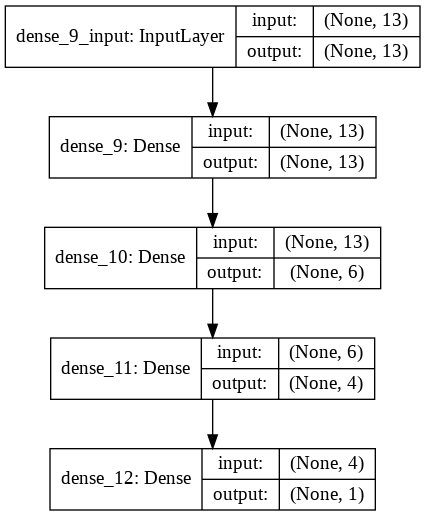

Importamos las bibliotecas necesarias. Usaremos el modelo secuencial y las capas densas y de activación.
```
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation


In [ ]:
# code here



## Definición de arquitectura
Defina el modelo secuencial con:
```
model = Sequential()
```



In [ ]:
# code here


Defina la capa de entrada con "n" neuronas de acuerdo con el esquema anterior.
```
model.add(Dense(n, input_dim=n, kernel_initializer='normal',activation='relu'))
```

In [ ]:
# code here


para definir las capas ocultas con "n" neuronas, donde n es el número de salidas indicadas para cada capa en el gráfico, utilice:
```
model.add(Dense(n, kernel_initializer='normal',activation='relu'))
```
defina todas las capas ocultas

In [ ]:
# code here


luego definimos la capa de salida según el gráfico con n neuronas, en este caso una sola salida
```
model.add(Dense(n, kernel_initializer='normal'))


In [ ]:
# code here


## Construye el modelo
Para compilar vamos a configurar las pérdidas con "mean_squared_error", el optimizador será "adam" y la métrica de error "mean_absolute_percentage_error"
```
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_percentage_error'])


In [ ]:
# code here


Si todo se hiciera correctamente podríamos obtener el resumen de nuestro modelo con
print (model.summary ())

In [ ]:
# code here


salida esperada:
```
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
=================================================================
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________
None


#### Solución

In [32]:
# importar dataset boston
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2,seed=10)

# imprimir los tamaños
print("Training set size:",x_train.shape)
print("Test set size",x_test.shape)

# importar librerias
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

# crear red
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal',activation='relu'))
model.add(Dense(6, kernel_initializer='normal',activation='relu'))
model.add(Dense(4, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# compilar red
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_percentage_error'])

#imprimir resumen de la red
print(model.summary())

57026/57026 [==============================] - 0s 0us/step
Training set size: (404, 13)
Test set size (102, 13)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 13)                182       
                                                                 
 dense_5 (Dense)             (None, 6)                 84        
                                                                 
 dense_6 (Dense)             (None, 4)                 28        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 299 (1.17 KB)
Trainable params: 299 (1.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Entrenamiento y Evaluación del modelo
Ahora realizamos diferentes entrenamientos de los diseños de redes neuronales y evaluaremos su desempeño.

Primero separaremos parte del conjunto de datos para usarlo como un lote de validación
```
x_val = x_train[300:,]
y_val = y_train[300:,]


In [ ]:
# code here


para entrenar el modelo usamos:
```
model.fit(x_train, y_train, batch_size=" ", epochs=" ",validation_data=(x_val,y_val))
```
entrenamos el modelo con un batch_size = 32 y  epochs = 5


In [ ]:
# code here


salida esperada:
```
Epoch 1/5
13/13 [==============================] - 1s 11ms/step - loss: 590.5057 - mean_absolute_percentage_error: 99.9820 - val_loss: 536.3701 - val_mean_absolute_percentage_error: 99.8721
Epoch 2/5
13/13 [==============================] - 0s 5ms/step - loss: 588.9862 - mean_absolute_percentage_error: 99.7726 - val_loss: 534.4178 - val_mean_absolute_percentage_error: 99.5771
Epoch 3/5
13/13 [==============================] - 0s 5ms/step - loss: 585.7842 - mean_absolute_percentage_error: 99.3131 - val_loss: 528.9545 - val_mean_absolute_percentage_error: 98.7309
Epoch 4/5
13/13 [==============================] - 0s 5ms/step - loss: 576.0627 - mean_absolute_percentage_error: 97.8896 - val_loss: 512.7003 - val_mean_absolute_percentage_error: 96.2009
Epoch 5/5
13/13 [==============================] - 0s 5ms/step - loss: 548.9406 - mean_absolute_percentage_error: 93.8543 - val_loss: 470.3179 - val_mean_absolute_percentage_error: 89.5356
<tensorflow.python.keras.callbacks.History at 0x7f5f86d37110>


Ahora evaluamos nuestro modelo con un entrenamiento de solo 5 épocas. Obviamente obtendremos un gran porcentaje de error

In [33]:
results = model.evaluate(x_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

4/4 [==============================] - 0s 4ms/step - loss: 599.2623 - mean_absolute_percentage_error: 100.1351
loss  :  599.2623291015625
mean_absolute_percentage_error  :  100.1351318359375


Salida esperada aproximadamente:
```
4/4 [==============================] - 0s 2ms/step - loss: 523.4060 - mean_absolute_percentage_error: 90.6716
loss  :  523.406005859375
mean_absolute_percentage_error  :  90.67156982421875


Ahora aumentaremos el entrenamiento a 100 épocas. solo tenemos que modificar el parámetro epochs = 100
```
model.fit(x_train, y_train, batch_size=32, epochs=100,validation_data=(x_val,y_val))


In [ ]:
# code here


Reevaluamos el modelo pero esta vez con más entrenamiento

In [ ]:
results = model.evaluate(x_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

salida esperada aproximadamente:
```
4/4 [==============================] - 0s 2ms/step - loss: 44.2733 - mean_absolute_percentage_error: 19.0453
loss  :  44.27332305908203
mean_absolute_percentage_error  :  19.045272827148438


#### Solución

In [ ]:
# create set validation
x_val = x_train[300:,]
y_val = y_train[300:,]

# training for 5 epochs
model.fit(x_train, y_train, batch_size=32, epochs=5,validation_data=(x_val,y_val))

# evaluate Network
results = model.evaluate(x_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

# training for 100 epochs
model.fit(x_train, y_train, batch_size=32, epochs=100,validation_data=(x_val,y_val))

# re-evaluate Network
results = model.evaluate(x_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

## Evaluacion Final

Finalmente con el siguiente código vamos a entrenar durante 200 epochs. Y haciendo uso de la biblioteca matplotlib generaremos los gráficos de porcentaje de error y pérdida para entrenamiento y validación.
Tenga en cuenta que agregamos el parámetro "verbose = 0" para que no muestre las estadísticas en pantalla en cada epoch.

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, batch_size=32, epochs=200,validation_data=(x_val,y_val), verbose=0)

# evaluate Network
results = model.evaluate(x_test, y_test)

# Plot training & validation accuracy values
plt.figure(figsize=(13,6))
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Observe que con un mayor entrenamiento disminuyen las pérdidas y la tasa de error. Hacer nuestro modelo más preciso y así aprender a predecir el valor de una casa en Boston según los parámetros de entrada

**Gracias por su Atención**